¡Hola, Alejandra!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Alejandra! Has hecho un excelente trabajo con los ajustes, cada vez más cercas de convertirte en un analista de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas de hipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 2</b> <a class="tocSkip"></a>

Hola Alejandra! Has hecho un excelente trabajo con los ajustes, completaste los valores nulos con la mediana y desarrollaste la prueba perfectamente de levene para mostrar el supuesto de varianzas iguales. 

Sigue con el excelente trabajo!
</div>

# Abre el archivo de datos y estudia la información general

In [2]:
import pandas as pd
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('/datasets/games.csv')

# Mostrar las primeras filas para tener una idea de cómo está estructurado el dataset
print(df.head())

# Mostrar información general sobre el DataFrame
print(df.info())


                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

In [3]:
#revisar nombre de las columnas
print(list(df.columns))


['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating']


# Remplaza los nombres de las columnas en minúsculas

In [4]:
#cambiar el nombre de las columnas a minúsculas
df.columns = df.columns.str.lower()
print(list(df.columns))


['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']


Revisión de los user_score de Xbox one

In [5]:
# Filtrar los datos de user_score para la plataforma Xbox One
xbox_one_scores = df[df['platform'] == 'Xbox One']['user_score']

# Contar los valores no nulos y nulos en 'user_score' para Xbox One
num_not_null = xbox_one_scores.notna().sum()
num_null = xbox_one_scores.isna().sum()

print("Cantidad de calificaciones no nulas para Xbox One en 'user_score':", num_not_null)
print("Cantidad de calificaciones nulas para Xbox One en 'user_score':", num_null)


# Ver todas las plataformas únicas en la columna 'platform'
print("Plataformas únicas en el DataFrame:")
print(df['platform'].unique())


Cantidad de calificaciones no nulas para Xbox One en 'user_score': 0
Cantidad de calificaciones nulas para Xbox One en 'user_score': 0
Plataformas únicas en el DataFrame:
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


# Convierte los datos en los tipos necesarios

In [6]:
#cambiar el tipo de datos de las columnas si es necesario
df['year_of_release'] = df['year_of_release'].fillna(0).astype(int)  # Rellena con 0 y cambia a entero


<div class="alert alert-block alert-info">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
En ocasiones podemos completar los valores faltantes con información con proxys. Por ejemplo en este caso los podríamos completar con los años de lanzamientos de los juegos en otras plataformas
</div>

Explicación:
Year_of_Release: Actualmente es de tipo float64, pero probablemente representa un año, que sería mejor como un entero (int) o incluso como una fecha (datetime) si necesitas trabajar con fechas completas.

Puedes cambiarla a un tipo entero después de tratar los valores nulos (por ejemplo, rellenándolos o eliminándolos)

In [7]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

Explicación:
User_Score: Esta columna está registrada como object, pero es probable que represente un puntaje numérico de los usuarios. Si este puntaje está en formato numérico (por ejemplo, "8.0" o "9.5"), lo mejor sería convertirlo a un tipo float. Sin embargo, si hay valores no numéricos (como "N/A" u otros), debes limpiarlos primero o convertir esos valores a NaN para evitar errores de conversión.

In [8]:
df['rating'] = df['rating'].astype('category')

Explicación:
Rating: Esta columna es de tipo object, y si el sistema de calificaciones tiene categorías limitadas (como "E", "T", "M"), 
podrías considerar convertirla en un tipo category, que ahorra memoria y mejora la velocidad en análisis categóricos.

# Valores ausentes 

In [9]:
#revisar valores nulos

print(df.isnull().sum())

#print(df.isnull().any().any())

# Eliminar las filas donde 'year_of_release' es 0 en el DataFrame original
df = df[df['year_of_release'] != 0]

# Verifica los primeros registros del DataFrame después de la eliminación
print(df.head())

      

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64
                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  
0     28.96      3.77         8.45          76.0         8.0      E  
1      3.58      6.81         0.77           NaN         NaN    NaN  
2     12.76      3.79     

# Modificación por 1era Revisión sacar la mediana para user_score

In [10]:
# Completar los valores nulos de 'user_score' con la mediana de esa columna
df['user_score'].fillna(df['user_score'].median(), inplace=True)

# Eliminar los valores nulos de las demás columnas
df.dropna(subset=['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'rating'], inplace=True)

# Verificar si hay valores nulos en el DataFrame
print(df.isnull().sum())

#eliminar valores nulos de las columnas
#df = df.dropna()
#print(df.isnull().sum())

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


# Calcular las ventas totales ( la suma de las ventas en todas las regiones )

In [11]:
# Calcula las ventas totales sumando las columnas de ventas por región
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

df.head(10)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,23.21
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de la base de datos y muy buen trabajo con la suma de todas las ventas. 
    
   

</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Solamente para el caso de user_score te recomiendo también completar los valores nulos con la mediana para no sesgar nuestros resultados, esto dado que estamos trabajando con distribuciones sesgadas    
    
   

</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Excelente trabajo completando los valores nulos con la mediana para no sesgar nuestros resultados

'''En código anterior ya se hizo el cálculo de la mediana para el user_score.'''

# Analiza los datos

#Numero de juegos que fueron lanzados cada año ¿ Son significativos los datos de cada periodo ? 
Si, se vé de manera cronológica como fue incrementando las ventas de juegos durante los años.
En 1985 fue la aparición del primer juego.
El periodo donde hubo más lanzamientos de juegos fue del 2001 al 2011.
En el periodo del 2012 al 2016 vuelve haber una baja.

In [12]:
print(df.groupby('year_of_release').size())

year_of_release
1985      1
1988      1
1992      1
1994      1
1996      7
1997     16
1998     27
1999     39
2000    142
2001    326
2002    627
2003    584
2004    558
2005    654
2006    619
2007    692
2008    710
2009    645
2010    497
2011    488
2012    313
2013    267
2014    258
2015    212
2016    217
dtype: int64


In [13]:
# Crear una nueva columna que suma las ventas en todas las regiones
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Agrupar por año y plataforma y sumar las ventas
sales_by_year_platform = df.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Reemplazar los valores NaN por 0
sales_by_year_platform = sales_by_year_platform.fillna(0)

# Mostrar la tabla resultante
print(sales_by_year_platform)


platform           3DS    DC     DS    GBA     GC     PC     PS     PS2  \
year_of_release                                                           
1985              0.00  0.00   0.00   0.00   0.00   0.04   0.00    0.00   
1988              0.00  0.00   0.00   0.00   0.00   0.03   0.00    0.00   
1992              0.00  0.00   0.00   0.00   0.00   0.02   0.00    0.00   
1994              0.00  0.00   0.00   0.00   0.00   0.00   1.26    0.00   
1996              0.00  0.00   0.00   0.00   0.00   2.62  17.47    0.00   
1997              0.00  0.00   0.00   0.00   0.00   6.56  36.21    0.00   
1998              0.00  0.00   0.00   0.00   0.00   0.10  47.29    0.00   
1999              0.00  2.04   0.00   0.00   0.00   0.11  52.05    0.00   
2000              0.00  1.98   0.00   0.00   0.00   3.17  54.17   33.76   
2001              0.00  0.53   0.00  44.58  26.34   5.35  19.58  151.29   
2002              0.00  0.00   0.00  37.69  45.25   8.55   0.11  174.80   
2003              0.00  0

<div class="alert alert-block alert-warning">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo con el desarrollo de este análisis,  nos ayuda a entender también sobre el comportamiento del mercado de videojuegos en el tiempo. Esto lo puedes complementar con una gráfica
</div>

In [14]:
#ordena por año de lanzamiento para ver la evolución y tendencias por año
#df_sorted = df.sort_values(by='year_of_release')
#print(df_sorted)

yearly_sales = df.groupby('year_of_release')['total_sales'].sum()
print(yearly_sales)

year_of_release
1985      0.04
1988      0.03
1992      0.02
1994      1.26
1996     20.09
1997     42.77
1998     47.39
1999     54.20
2000     94.07
2001    269.68
2002    310.25
2003    266.35
2004    337.41
2005    350.42
2006    427.91
2007    477.30
2008    513.34
2009    483.06
2010    430.24
2011    391.89
2012    291.95
2013    267.29
2014    192.67
2015    159.18
2016     91.86
Name: total_sales, dtype: float64


In [15]:
#Calcular las ventas totales por plataforma
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(platform_sales)

platform
PS2     981.53
X360    858.78
PS3     788.92
Wii     682.11
DS      434.19
PS4     243.05
PS      228.14
XB      226.66
PSP     196.55
PC      189.31
GC      169.37
GBA     166.55
XOne    129.62
3DS     124.13
WiiU     66.27
PSV      30.94
DC        4.55
Name: total_sales, dtype: float64


In [16]:
#Filtrar plataformas más populares
top_platforms = platform_sales.head(5).index
df_top_platforms = df[df['platform'].isin(top_platforms)]
print(df_top_platforms)

                                      name platform  year_of_release  \
0                               Wii Sports      Wii             2006   
2                           Mario Kart Wii      Wii             2008   
3                        Wii Sports Resort      Wii             2009   
6                    New Super Mario Bros.       DS             2006   
7                                 Wii Play      Wii             2006   
...                                    ...      ...              ...   
16529  Hoshigami: Ruining Blue Earth Remix       DS             2007   
16550                 Superstars V8 Racing     X360             2009   
16591                    Micro Machines V4      PS2             2006   
16613             Dragon Ball Z for Kinect     X360             2012   
16698                     Mega Brain Boost       DS             2008   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
0            Sports     41.36     28.96      3.77      

In [17]:
#Analizar la distribución de ventas de cada plataforma por año
#Agrupar las plataformas principales por año y agrupa las ventas para cada combinación. 

platform_sales_by_year = df_top_platforms.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()


print(platform_sales_by_year)

#La función unstack() aquí facilita la comparación de las ventas de cada plataforma a lo largo de los años.


platform            DS     PS2     PS3     Wii    X360
year_of_release                                       
2000               NaN   33.76     NaN     NaN     NaN
2001               NaN  151.29     NaN     NaN     NaN
2002               NaN  174.80     NaN     NaN     NaN
2003               NaN  147.77     NaN     NaN     NaN
2004              3.38  190.14     NaN     NaN     NaN
2005             97.61  123.20     NaN     NaN    7.64
2006             75.88   77.86   20.12  135.95   48.92
2007             89.92   52.46   68.72  128.28   90.24
2008             78.17   24.38  111.13  133.39  130.07
2009             49.61    5.28  118.86  161.23  111.59
2010             30.73    0.59  126.55   74.66  159.80
2011              7.87     NaN  135.66   35.37  129.92
2012              1.02     NaN   94.30   13.23   95.68
2013               NaN     NaN  102.22     NaN   74.82
2014               NaN     NaN   11.34     NaN   10.10
2015               NaN     NaN    0.02     NaN     NaN


#  Identificar plataformas que solían ser populares pero ya no tienen ventas

In [18]:
# Primero, observa el último año disponible en los datos
ultimo_año = df['year_of_release'].max()

# Filtra plataformas que tienen ventas en años anteriores pero no en el último año
ventas_historicas = df.groupby('platform')['year_of_release'].max()
plataformas_descontinuadas = ventas_historicas[ventas_historicas < ultimo_año].index
print(plataformas_descontinuadas)

Index(['DC', 'DS', 'GBA', 'GC', 'PS', 'PS2', 'PS3', 'PSP', 'Wii', 'X360',
       'XB'],
      dtype='object', name='platform')


# Visualizar la variación de ventas por plataforma en cada año

/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<Figure size 1200x600 with 0 Axes>

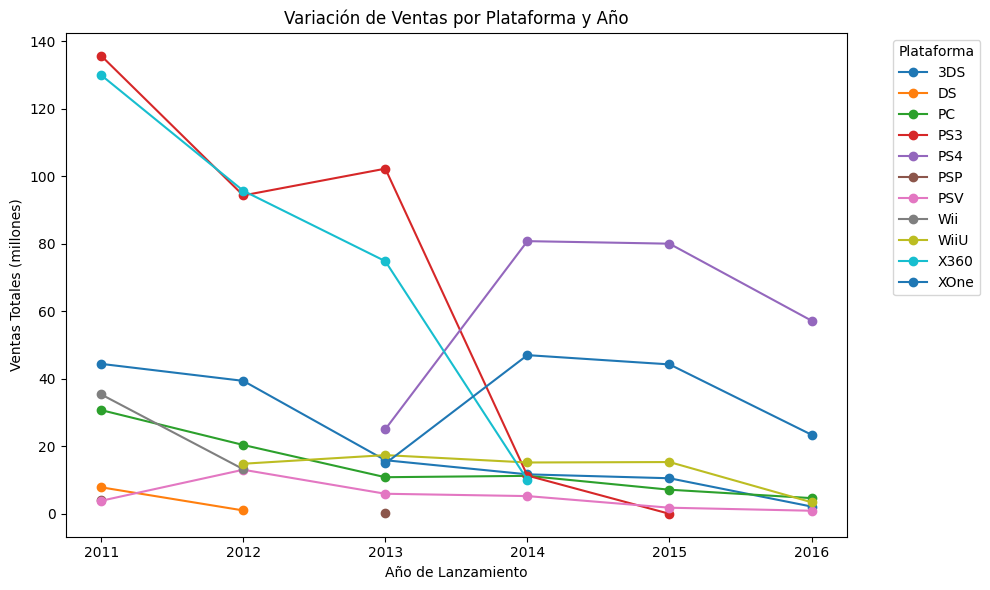

In [19]:
# Filtrar para incluir solo los datos de 2011 a 2016
df_filtered = df[(df['year_of_release'] >= 2011) & (df['year_of_release'] <= 2016)]

# Calcular las ventas totales por plataforma y año en el rango seleccionado
df_filtered.loc[:, 'total_sales'] = df_filtered['na_sales'] + df_filtered['eu_sales'] + df_filtered['jp_sales'] + df_filtered['other_sales']

# Agrupar por 'year_of_release' y 'platform' y sumar las ventas totales
sales_by_platform_year = df_filtered.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

import matplotlib.pyplot as plt

# Crear gráfico de líneas
plt.figure(figsize=(12, 6))
sales_by_platform_year.plot(kind='line', marker='o', figsize=(10, 6))

# Añadir título y etiquetas
plt.title('Variación de Ventas por Plataforma y Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (millones)')

# Mostrar la leyenda para identificar las plataformas
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo con el desarrollo de la gráfica. Solamente te recomendaría que intentes reducir el periodo dado que el perido actual puede resultar muy extenso. Recordemos que con base en la información la popularidad la alcanzan en los primeros años. Es por ello que con un periodo largo puede no ser posible analizar de forma clara las plataformas y videojuegos actualizados y podrías estar analizando los desactualizados. Es por ello y dado que buscamos responder qué vender en 2017 te recomendareia gráficar un periodo que no supere los 5 años.     

</div>

Se modificó gráfico para que solo fueran 5 años.

# Construcción de Modelo 2017

    Crecimiento Promedio Anual


In [20]:
import pandas as pd


# Crear una nueva columna 'total_sales' sumando las ventas de todas las regiones
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

# Agrupar por año y plataforma para obtener las ventas totales por plataforma por año
platform_sales = df.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

# Calcular la tasa de crecimiento anual por plataforma
platform_sales['growth_rate'] = platform_sales.groupby('platform')['total_sales'].pct_change()

# Calcular la tasa de crecimiento promedio para cada plataforma
platform_sales_avg_growth = platform_sales.groupby('platform')['growth_rate'].mean().reset_index()

# Obtener las ventas para 2016 para cada plataforma
sales_2016 = platform_sales[platform_sales['year_of_release'] == 2016][['platform', 'total_sales']]

# Proyectar las ventas para 2017 por plataforma usando el crecimiento promedio
platform_sales_avg_growth = platform_sales_avg_growth.merge(sales_2016, on='platform', how='left')
platform_sales_avg_growth['sales_2017'] = platform_sales_avg_growth['total_sales'] * (1 + platform_sales_avg_growth['growth_rate'])

# Mostrar la proyección de ventas para 2017 por plataforma
print(platform_sales_avg_growth[['platform', 'sales_2017']])

   platform  sales_2017
0       3DS    1.360040
1        DC         NaN
2        DS         NaN
3       GBA         NaN
4        GC         NaN
5        PC   37.369419
6        PS         NaN
7       PS2         NaN
8       PS3         NaN
9       PS4   93.960350
10      PSP         NaN
11      PSV    1.034948
12      Wii         NaN
13     WiiU    2.828764
14     X360         NaN
15       XB         NaN
16     XOne   36.095305


# ¿Cuánto tardan las plataformas en aparecer y las antiguas en desaparecer?


Duran de 7 a 10 años en estar presentes en el mercado y cuando arranca una nueva otra aparece en el rango de 3 a 5 años .



# ¿Que plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen?

En su momento fueron las siguientes como top5 de ventas:
platform
PS2     962.42
X360    862.91
PS3     791.77
Wii     672.58
DS      383.21

Todas con el tiempo tienen su auge de ventas , pero cuando sale una nueva plataforma la anterior va perdiendo presencia en el vá mercado y la nueva plataforma para incrementando tu presencia. 

# Diagrama de caja para las ventas globales

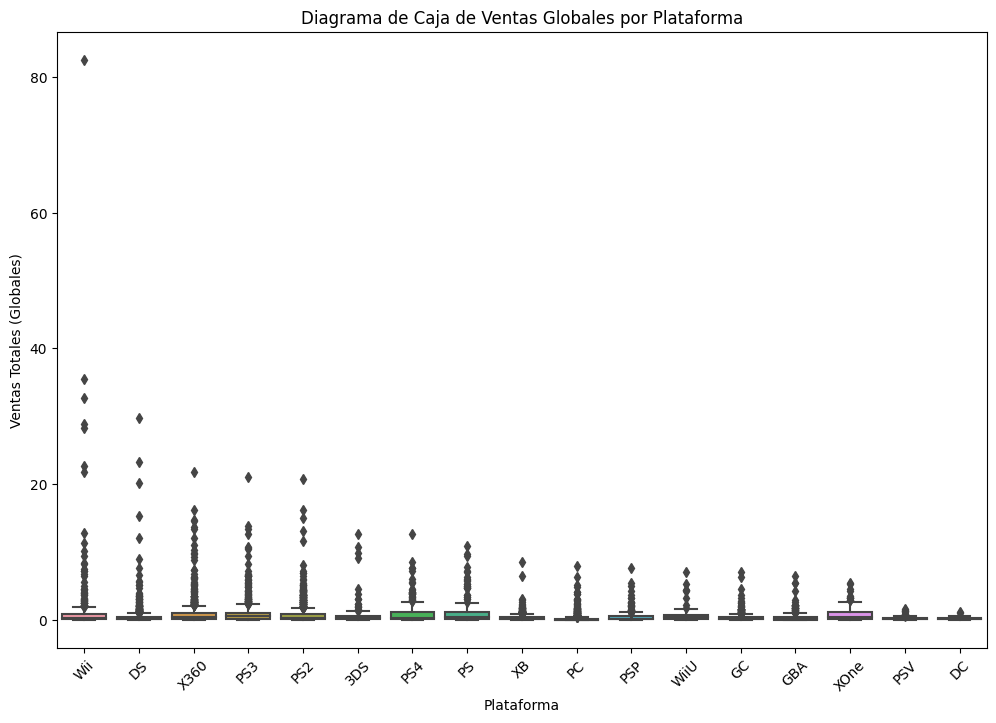

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el diagrama de caja de ventas totales por plataforma
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='platform', y='total_sales')
plt.title("Diagrama de Caja de Ventas Globales por Plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Ventas Totales (Globales)")
plt.xticks(rotation=45)  # Rotar los nombres de las plataformas si son demasiadas
plt.show()

<div class="alert alert-block alert-warning">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el desarrollo de la gráfica de cajas, este tipo de gráficos nos ayuda a comparar resultados de manera precisa. Solamente recuerda que los graficos de box-plot nos ayudan a identificar outliers que posteriomente en el desarrollo de las pruebas de hipótesis nos servirían eliminar para que no puedan sesgar nuestros resultados. 
</div>

Las plataformas que presentan outliners en sus ventas son el Wii, Ds, X360, PS3 y PS2. 

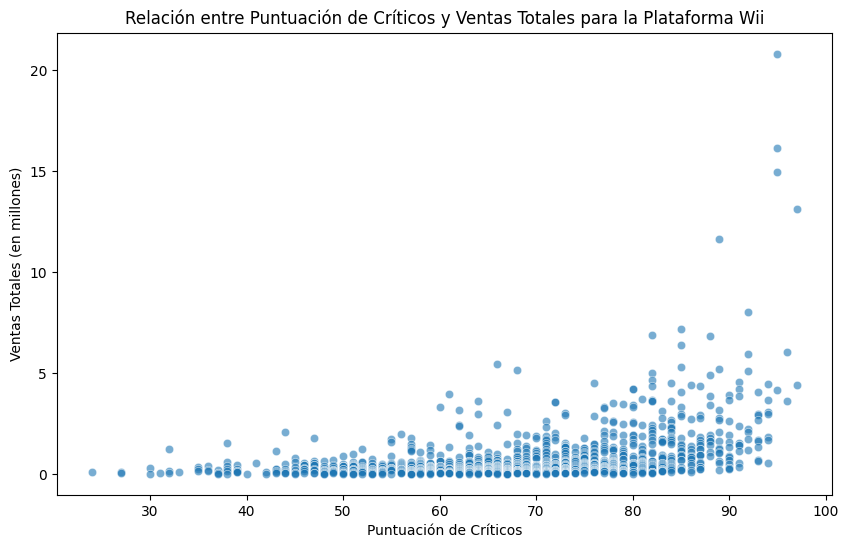

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar el DataFrame para obtener solo los datos de la plataforma Wii
df_wii = df[df['platform'] == 'PS2']

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_wii, x='critic_score', y='total_sales', alpha=0.6)
plt.title("Relación entre Puntuación de Críticos y Ventas Totales para la Plataforma Wii")
plt.xlabel("Puntuación de Críticos")
plt.ylabel("Ventas Totales (en millones)")
plt.show()

<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el análisis de la relación estre las scores y las ventas. 
</div>

#Observa como las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular ( tu elección ). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

En el gráfico anterior para la plataforma PS2 , se vé que las ventas incrementan cuando la puntuación de crlíticos es alta. Esto es para el caso de el PS2. 

Pera para el caso del Wii este comportamiento no es tan notorio, como si para esa plataforma la puntuación de críticos no fuera tan importante para sus ventas , aparentemente no tiene una correlación.



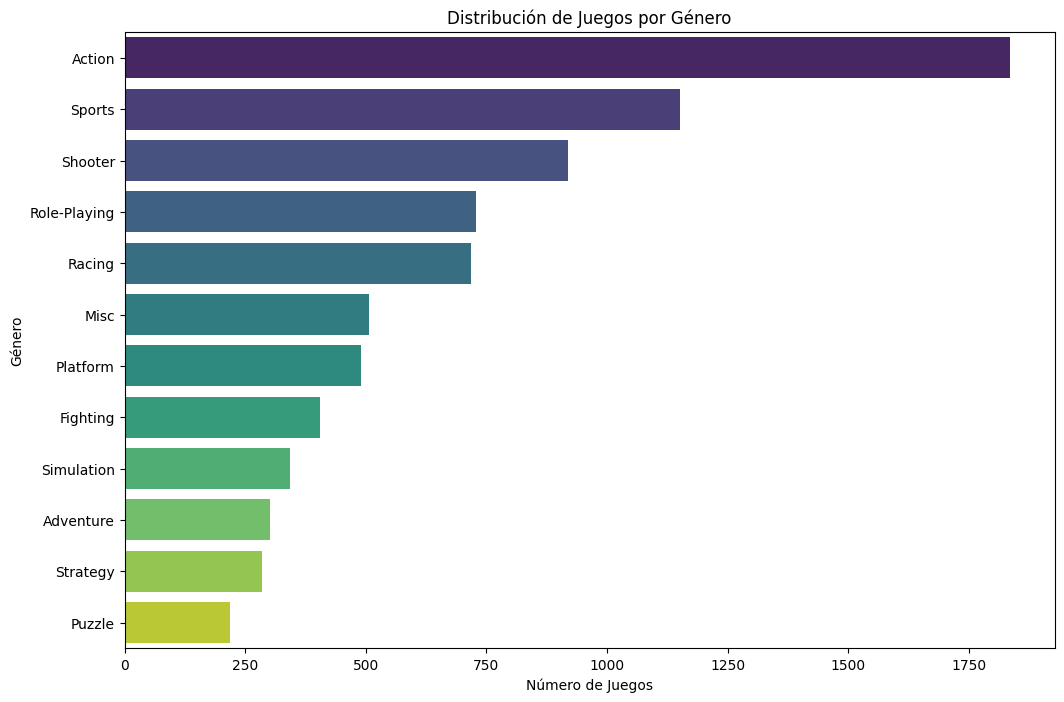

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contar el número de juegos por género
genre_counts = df['genre'].value_counts()

# Crear un gráfico de barras para mostrar la distribución de juegos por género
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.title("Distribución de Juegos por Género")
plt.xlabel("Número de Juegos")
plt.ylabel("Género")
plt.show()

#En el gráfico anterior podemos ver que los juegos que mayor creación tienen son los de acción, sports, shooter, Role-playing, Racing.

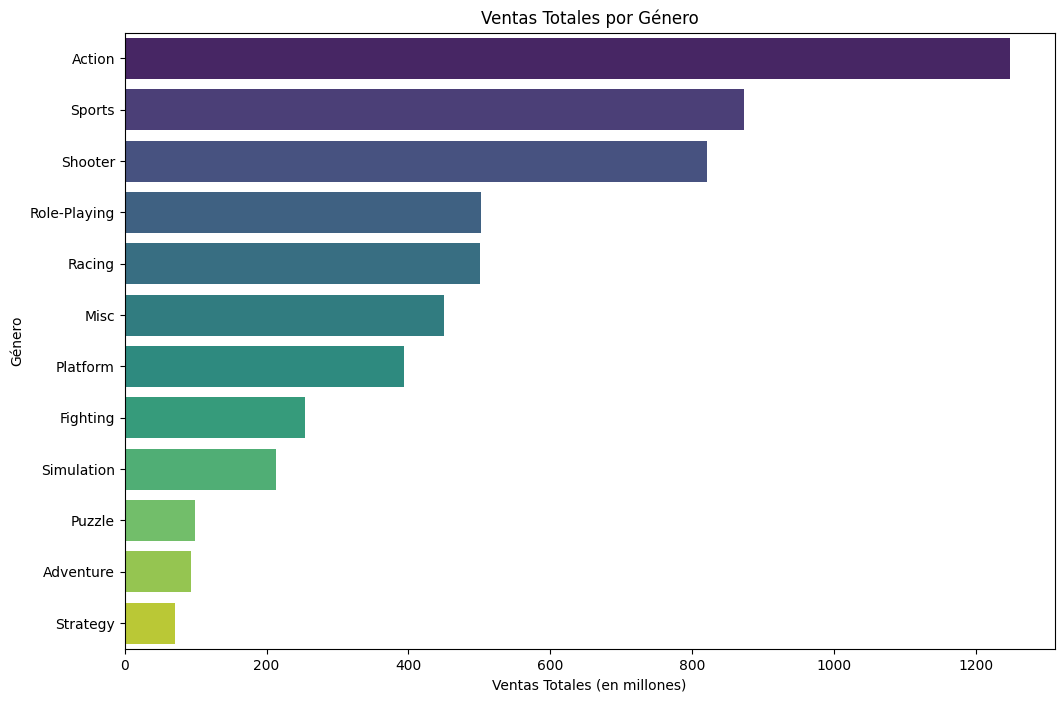

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar el total de ventas por género
genre_sales = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Crear un gráfico de barras para mostrar las ventas totales por género
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_sales.values, y=genre_sales.index, palette="viridis")
plt.title("Ventas Totales por Género")
plt.xlabel("Ventas Totales (en millones)")
plt.ylabel("Género")
plt.show()

En el gráfico anterior podemos observar que el comportamiento de existencia de número de juegos está relacionando con la demanda de las ventas. Por ejemplo hay mucho más juegos creados de acción porque su demanda es mucho mayor, después le siguen los de action, sports,shooter, rol-playing y racing.

# 4.Crea un perfil de usuario para cada región

In [25]:
import pandas as pd

# Suponemos que 'df' es el DataFrame con los datos proporcionados
# Primero, calculamos las ventas totales por plataforma en cada región (NA, EU, JP)
platform_sales = df.groupby(['platform'])[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Calculamos las cuotas de mercado para cada plataforma en cada región
platform_sales['na_market_share'] = platform_sales['na_sales'] / platform_sales['na_sales'].sum() * 100
platform_sales['eu_market_share'] = platform_sales['eu_sales'] / platform_sales['eu_sales'].sum() * 100
platform_sales['jp_market_share'] = platform_sales['jp_sales'] / platform_sales['jp_sales'].sum() * 100

# Obtenemos las 5 plataformas principales en cada región
top_platforms_na = platform_sales[['na_sales', 'na_market_share']].nlargest(5, 'na_sales')
top_platforms_eu = platform_sales[['eu_sales', 'eu_market_share']].nlargest(5, 'eu_sales')
top_platforms_jp = platform_sales[['jp_sales', 'jp_market_share']].nlargest(5, 'jp_sales')

# Calculamos los 5 géneros principales en cada región
genre_sales_na = df.groupby('genre')['na_sales'].sum().nlargest(5)
genre_sales_eu = df.groupby('genre')['eu_sales'].sum().nlargest(5)
genre_sales_jp = df.groupby('genre')['jp_sales'].sum().nlargest(5)

# Calculamos las clasificaciones de ESRB más comunes por región
esrb_ratings_na = df.groupby('rating')['na_sales'].sum().nlargest(5)
esrb_ratings_eu = df.groupby('rating')['eu_sales'].sum().nlargest(5)
esrb_ratings_jp = df.groupby('rating')['jp_sales'].sum().nlargest(5)

# Mostramos los resultados
print("Top 5 plataformas en NA (América del Norte):")
print(top_platforms_na)

print("\nTop 5 plataformas en EU (Europa):")
print(top_platforms_eu)

print("\nTop 5 plataformas en JP (Japón):")
print(top_platforms_jp)

print("\nTop 5 géneros en NA (América del Norte):")
print(genre_sales_na)

print("\nTop 5 géneros en EU (Europa):")
print(genre_sales_eu)

print("\nTop 5 géneros en JP (Japón):")
print(genre_sales_jp)

print("\nTop 5 clasificaciones ESRB en NA (América del Norte):")
print(esrb_ratings_na)

print("\nTop 5 clasificaciones ESRB en EU (Europa):")
print(esrb_ratings_eu)

print("\nTop 5 clasificaciones ESRB en JP (Japón):")
print(esrb_ratings_jp)

# Comparar las variaciones en cuotas de mercado entre regiones
platform_sales_comparison = platform_sales[['na_market_share', 'eu_market_share', 'jp_market_share']]

# Mostrar la variación de cuota de mercado entre regiones
print("\nVariación de cuota de mercado entre regiones:")
print(platform_sales_comparison)


Top 5 plataformas en NA (América del Norte):
          na_sales  na_market_share
platform                           
X360        537.81        19.025063
PS2         488.60        17.284256
Wii         359.67        12.723349
PS3         344.41        12.183526
DS          205.48         7.268868

Top 5 plataformas en EU (Europa):
          eu_sales  eu_market_share
platform                           
PS3         274.62        16.454953
PS2         268.05        16.061285
X360        235.02        14.082161
Wii         208.50        12.493109
PS4         111.78         6.697745

Top 5 plataformas en JP (Japón):
          jp_sales  jp_market_share
platform                           
DS           86.75        19.548415
PS2          76.50        17.238660
PS3          54.52        12.285643
Wii          52.49        11.828199
PS           39.71         8.948329

Top 5 géneros en NA (América del Norte):
genre
Action     621.04
Sports     482.11
Shooter    451.56
Racing     241.94
Misc      

# 5 Plataformas principales por cada región

In [26]:


# Paso 1: Calcular las ventas totales de cada plataforma en cada región
platform_sales = df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Paso 2: Calcular el total de ventas por región para obtener las cuotas de mercado
platform_sales['na_market_share'] = platform_sales['na_sales'] / platform_sales['na_sales'].sum() * 100
platform_sales['eu_market_share'] = platform_sales['eu_sales'] / platform_sales['eu_sales'].sum() * 100
platform_sales['jp_market_share'] = platform_sales['jp_sales'] / platform_sales['jp_sales'].sum() * 100

# Paso 3: Seleccionar las cinco plataformas con las ventas más altas
top_platforms = platform_sales[['na_sales', 'na_market_share', 'eu_sales', 'eu_market_share', 'jp_sales', 'jp_market_share']].nlargest(5, 'na_sales')

# Mostrar las cinco plataformas principales y sus cuotas de mercado por región
print("Cinco plataformas principales y sus cuotas de mercado en cada región:")
print(top_platforms)


Cinco plataformas principales y sus cuotas de mercado en cada región:
          na_sales  na_market_share  eu_sales  eu_market_share  jp_sales  \
platform                                                                   
X360        537.81        19.025063    235.02        14.082161     10.12   
PS2         488.60        17.284256    268.05        16.061285     76.50   
Wii         359.67        12.723349    208.50        12.493109     52.49   
PS3         344.41        12.183526    274.62        16.454953     54.52   
DS          205.48         7.268868    108.05         6.474247     86.75   

          jp_market_share  
platform                   
X360             2.280461  
PS2             17.238660  
Wii             11.828199  
PS3             12.285643  
DS              19.548415  


CONCLUSIONES: 
Cada Región tiene su plataforma de mayor uso y no siempre coincide en todos los mercados .
Por ejemplo en America del Norte el más exitoso fue el X360 y en Japón tuvo una participación muy baja de 2.31% en el mercado.
Las Plataformas comunmente más compradas en los 3 mercados NA, EU, JP son PS2 (17%, 15%, 17%), PS3 (12%,16%,12%) y Wii (12%,12%,11.9%) en orden como anteriormente se menciona cada mercado.


Top 5 plataformas en NA (América del Norte):
          na_sales  na_market_share
platform                           
X360        539.91        19.783735
PS2         481.15        17.630613
Wii         351.57        12.882458
PS3         344.82        12.635120
DS          174.19         6.382784

Top 5 plataformas en EU (Europa):
          eu_sales  eu_market_share
platform
PS3         276.03        16.933317
PS2         260.13        15.957917
X360        236.62        14.515674
Wii         207.81        12.748298
PS4         111.78         6.857248

Top 5 plataformas en JP (Japón):
          jp_sales  jp_market_share
platform                           
DS           83.66        19.043934
PS2          76.39        17.389028
PS3          55.21        12.567721
Wii          52.39        11.925791
PS           38.85         8.843615


# 5 Generos principales por cada región

In [27]:
import pandas as pd

# Calcular las ventas por género y región
genre_sales_by_region = df.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Obtener los cinco géneros principales por ventas en cada región
top_genres_na = genre_sales_by_region['na_sales'].nlargest(5)
top_genres_eu = genre_sales_by_region['eu_sales'].nlargest(5)
top_genres_jp = genre_sales_by_region['jp_sales'].nlargest(5)

# Crear un DataFrame para comparar los cinco géneros principales en cada región
top_genres_comparison = pd.DataFrame({
    'NA_Top_Genres': top_genres_na.index,
    'NA_Sales': top_genres_na.values,
    'EU_Top_Genres': top_genres_eu.index,
    'EU_Sales': top_genres_eu.values,
    'JP_Top_Genres': top_genres_jp.index,
    'JP_Sales': top_genres_jp.values
})

# Mostrar la tabla de comparación
print("Comparación de los cinco géneros principales en cada región:")
print(top_genres_comparison)


Comparación de los cinco géneros principales en cada región:
  NA_Top_Genres  NA_Sales EU_Top_Genres  EU_Sales JP_Top_Genres  JP_Sales
0        Action    621.04        Action    399.76  Role-Playing    122.68
1        Sports    482.11       Shooter    262.15        Action     77.16
2       Shooter    451.56        Sports    258.36      Platform     43.31
3        Racing    241.94        Racing    171.49        Sports     35.14
4          Misc    241.92          Misc    129.74          Misc     33.42


CONCLUSIONES: El genero de Action es el que más participación tiene en los 3 mercados. Aunque el favorito en el mercado Japonés es el Role-Playing.

# Afectación de las clasificaciones ESRB  en regiones individuales

In [28]:
# Agrupar por clasificación ESRB y sumar ventas por región
esrb_sales_by_region = df.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Cambiar el nombre de las columnas para que sean más descriptivas
esrb_sales_by_region.columns = ['NA_Sales', 'EU_Sales', 'JP_Sales']

# Ordenar la tabla por las ventas en América del Norte (NA) en orden descendente como referencia principal
esrb_sales_sorted = esrb_sales_by_region.sort_values(by='NA_Sales', ascending=False)

# Mostrar la tabla de comparación consolidada
print("Tabla comparativa de ventas por clasificación ESRB en todas las regiones:")
print(esrb_sales_sorted)


Tabla comparativa de ventas por clasificación ESRB en todas las regiones:
        NA_Sales  EU_Sales  JP_Sales
rating                              
E        1081.82    630.41    194.74
M         726.47    468.10     62.28
T         712.59    406.93    145.80
E10+      304.45    162.68     39.49
AO          1.26      0.61      0.00
K-A         0.26      0.16      1.46
EC          0.00      0.00      0.00
RP          0.00      0.03      0.00


CONCLUSIONES: Las clasificaciones E(Everyone) , M( Mature 17+), T(Teen), E10 (Everyone 10 and older) son las clasificaciones más vendidas en las 3 regiones. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Excelente! Con este análisis por región ayuda a complementar el análisis general anterior y a hacer zoom a los resultados por cada una de las regiones.   

</div>

# Código para la Hipótesis 1: Calificaciones de los Usuarios entre Xbox One y PC

# Código para la Hipótesis 2: Calificaciones de los Usuarios entre los Géneros de Acción y Deportes

In [29]:
import pandas as pd
import scipy.stats as st


# Filtra los datos para Xbox One y PC
xbox_one_scores = df[(df['platform'] == 'XOne')]['user_score'].dropna()
pc_scores = df[(df['platform'] == 'PC')]['user_score'].dropna()

# Filtra los datos para Acción y Deportes
accion_scores = df[(df['genre'] == 'Action')]['user_score'].dropna()
deportes_scores = df[(df['genre'] == 'Sports')]['user_score'].dropna()

# Nivel de significancia
alpha = 0.05

# Prueba de Levene para Xbox One vs PC
levene_result_platform = st.levene(xbox_one_scores, pc_scores)
print(f"Prueba de Levene para plataformas: p-valor = {levene_result_platform.pvalue}")

# Definición de equal_var para la prueba T según el resultado de Levene
#equal_var_platform = levene_result_platform.pvalue > alpha

#Hipotesis nula: Las varianzas de las calificaciones son iguales . 
#Hipotesis alternativa: Las varianzas de las calificaciones son diferentes ( lo que yo creo)


# Interpreta el resultado de la prueba T para plataformas
if levene_result_platform.pvalue < alpha:
    print("Rechazamos la hipótesis nula: Las varianzas de calificaciones de los usuarios para Xbox One y PC son diferentes.")
    equal_var_platform=False
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas de calificaciones de los usuarios para Xbox One y PC son las mismas.")
    equal_var_platform=True


# Prueba T para plataformas Xbox One vs PC
t_test_platform = st.ttest_ind(xbox_one_scores, pc_scores, equal_var=equal_var_platform)
print(f"Prueba T para plataformas: estadístico T = {t_test_platform.statistic}, p-valor = {t_test_platform.pvalue}")

# Interpreta el resultado de la prueba T para plataformas
if t_test_platform.pvalue < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: Las calificaciones promedio de los usuarios para Xbox One y PC son las mismas.")

# Prueba de Levene para géneros Acción vs Deportes
levene_result_genre = st.levene(accion_scores, deportes_scores)
print(f"Prueba de Levene para géneros: p-valor = {levene_result_genre.pvalue}")

# Definición de equal_var para la prueba T según el resultado de Levene
equal_var_genre = levene_result_genre.pvalue > alpha

# Prueba T para géneros Acción vs Deportes
t_test_genre = st.ttest_ind(accion_scores, deportes_scores, equal_var=equal_var_genre)
print(f"Prueba T para géneros: estadístico T = {t_test_genre.statistic}, p-valor = {t_test_genre.pvalue}")

# Interpreta el resultado de la prueba T para géneros
if t_test_genre.pvalue < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas.")

Prueba de Levene para plataformas: p-valor = 0.2715651891087979
No podemos rechazar la hipótesis nula: Las varianzas de calificaciones de los usuarios para Xbox One y PC son las mismas.
Prueba T para plataformas: estadístico T = -4.242493768243071, p-valor = 2.4625786842916353e-05
Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.
Prueba de Levene para géneros: p-valor = 0.5363983496102895
Prueba T para géneros: estadístico T = -0.8101797053091849, p-valor = 0.41790146080279555
No podemos rechazar la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas.


CONCLUSIONES:
Hipótesis 1: Calificaciones de los Usuarios entre Xbox One y PC
Prueba de Levene:

Resultado: p-valor = 0.2715651891087979
Interpretación: La prueba de Levene verifica si las varianzas de las calificaciones de usuarios para Xbox One y PC son iguales.
Con un nivel de significancia comúnmente usado, α = 0.05, el p-valor obtenido (0.2716) es mayor a 0.05. Esto significa que no podemos rechazar la hipótesis nula de la prueba de Levene, indicando que las varianzas son iguales para ambas plataformas.
Por lo tanto, establecemos equal_var=True en la prueba T de Student, lo que implica que la prueba T debe asumir varianzas iguales entre ambas muestras.
Prueba T de Student:

Resultado: estadístico T = -4.2425, p-valor = 2.4626e-05 (o 0.0000246)
Interpretación: La prueba T verifica si las calificaciones promedio de los usuarios para Xbox One y PC son iguales.
Con un nivel de significancia α = 0.05, el p-valor obtenido (0.0000246) es mucho menor que 0.05. Esto indica una diferencia estadísticamente significativa entre las calificaciones promedio de ambas plataformas.
Conclusión de la prueba T: Rechazamos la hipótesis nula, lo que significa que las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.

Hipótesis 2: Calificación de los usuarios entre los géneros de Acción y deportes.
Prueba de Levene:

Resultado: p-valor = 0.5364
Interpretación: Con un nivel de significancia α = 0.05, el p-valor (0.5364) es mayor que 0.05. Esto significa que no podemos rechazar la hipótesis nula de la prueba de Levene, lo que indica que las varianzas de las calificaciones entre los géneros Acción y Deportes son estadísticamente iguales.
Consecuencia: Esto permite establecer equal_var=True en la prueba T de Student, lo cual significa que la prueba T asume varianzas iguales entre ambas muestras.
Prueba T de Student:

Resultado: estadístico T = -0.8102, p-valor = 0.4179
Interpretación: La prueba T evalúa si las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
Con un nivel de significancia α = 0.05, el p-valor (0.4179) es mucho mayor que 0.05. Esto significa que no hay evidencia estadística suficiente para rechazar la hipótesis nula de la prueba T, indicando que las calificaciones promedio de los géneros Acción y Deportes no son significativamente diferentes.
Conclusión General
Dado que:

Las varianzas de las calificaciones de los géneros Acción y Deportes son iguales (según la prueba de Levene).
No existe una diferencia estadísticamente significativa entre las calificaciones promedio de ambos géneros (según la prueba T de Student).
Podemos concluir que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son, estadísticamente, las mismas. Esto sugiere que la percepción o satisfacción de los usuarios, en términos de calificaciones, no varía significativamente entre estos dos géneros.




 <div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para estas pruebas te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocar como equal_var=False. Para esto, primero debes calcular las varianzas para cada uno de las plataformas y en un segundo tiempo debes de hacer uso de la siguiente función: 
    
    levene(xbox_one_scores, pc_scores)
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var". En este caso como rechazamos la hipótesis de varianzas iguales debemos de colocar False. Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene    
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Excelente trabajo con la prueba de levene para mostrar el supuesto de varianzas iguales!

# CONCLUSION GENERAL

Variación Regional:
    Existen diferencias significativas en la preferencia de plataformas y géneros entre regiones. 
    Mientras que en NA y EU predominan los géneros de acción y disparos, en Japón sobresalen los RPG, lo que destaca la influencia cultural en las preferencias de género.
Preferencia de Marca: 
    Sony y Nintendo tienen una presencia significativa en todas las regiones, aunque la preferencia específica de plataforma varía. Xbox es popular principalmente en NA y EU, pero tiene poca presencia en Japón.
Cuotas de Mercado por Región:
    Las cuotas de mercado varían ampliamente. En Japón, las consolas portátiles de Nintendo como DS ocupan una mayor cuota, mientras que en NA y EU dominan las consolas de sobremesa.

   Este análisis sugiere que una estrategia global para los videojuegos debería considerar estas variaciones culturales y de mercado, adaptando los lanzamientos de plataformas y juegos
    según las preferencias regionales para maximizar el éxito comercial en cada región.


    

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Alejandra, en general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera. Además, el análisis explorario de datos fue completo al mostrar resultados relevantes que pueden ser de mucha utilidad para la toma de decisiones y desarrollaste las pruebas de hipótesis de una buena manera. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:

* Verificar que cuando llenamos variables con valores nulos los estamos comletando con valores que no sesgan nuestros resultados

*  Considerar eliminar registros atipicos que puedan sesgar nuestros resultados. 
    
*  Verificar los supuestos de las pruebas de hipótesis. 
    
</div>